# –ù–æ–≤—ã–π –∞—Ç—Ä–∏–±—É—Ç
–°–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—ã–π –∞—Ç—Ä–∏–±—É—Ç "–ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å –∑–µ–º–ª—è—Ç—Ä–µ—Å–µ–Ω–∏—è" –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç —Å—á–∏—Ç–∞—Ç—å—Å—è –∫–∞–∫ (–º–∞–≥–Ω–∏—Ç—É–¥–∞) / (–≥–ª—É–±–∏–Ω–∞ + 1)

In [ ]:
# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç
df = pd.read_csv('earthquake_data_tsunami.csv')

print("–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞:", df.shape)
print("\n–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:")
df.head()


–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (782, 13)

–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:


magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1

In [3]:
# –î–æ–±–∞–≤–ª—è–µ–º –Ω–æ–≤—ã–π –∞—Ç—Ä–∏–±—É—Ç "–ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è"
# –§–æ—Ä–º—É–ª–∞: –º–∞–≥–Ω–∏—Ç—É–¥–∞ / (–≥–ª—É–±–∏–Ω–∞ + 1)
# +1 –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –¥–µ–ª–µ–Ω–∏—è –Ω–∞ –Ω–æ–ª—å
df['intensity'] = df['magnitude'] / (df['depth'] + 1)

print("–ù–æ–≤—ã–π –∞—Ç—Ä–∏–±—É—Ç 'intensity' –¥–æ–±–∞–≤–ª–µ–Ω!")
print("\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –Ω–æ–≤–æ–≥–æ –∞—Ç—Ä–∏–±—É—Ç–∞:")
print(f"–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {df['intensity'].mean():.3f}")
print(f"–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {df['intensity'].std():.3f}")
print(f"–ú–∏–Ω–∏–º—É–º: {df['intensity'].min():.3f}")
print(f"–ú–∞–∫—Å–∏–º—É–º: {df['intensity'].max():.3f}")

print("\n–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ —Å –Ω–æ–≤—ã–º –∞—Ç—Ä–∏–±—É—Ç–æ–º:")
df[['magnitude', 'depth', 'intensity', 'tsunami']].head()


–ù–æ–≤—ã–π –∞—Ç—Ä–∏–±—É—Ç 'intensity' –¥–æ–±–∞–≤–ª–µ–Ω!

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –Ω–æ–≤–æ–≥–æ –∞—Ç—Ä–∏–±—É—Ç–∞:
–°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 0.305
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 0.231
–ú–∏–Ω–∏–º—É–º: 0.010
–ú–∞–∫—Å–∏–º—É–º: 1.757

–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ —Å –Ω–æ–≤—ã–º –∞—Ç—Ä–∏–±—É—Ç–æ–º:


magnitude    depth  intensity  tsunami
0        7.0   14.000   0.466667        1
1        6.9   25.000   0.265385        0
2        7.0  579.000   0.012069        1
3        7.3   37.000   0.192105        1
4        6.6  624.464   0.010552        1

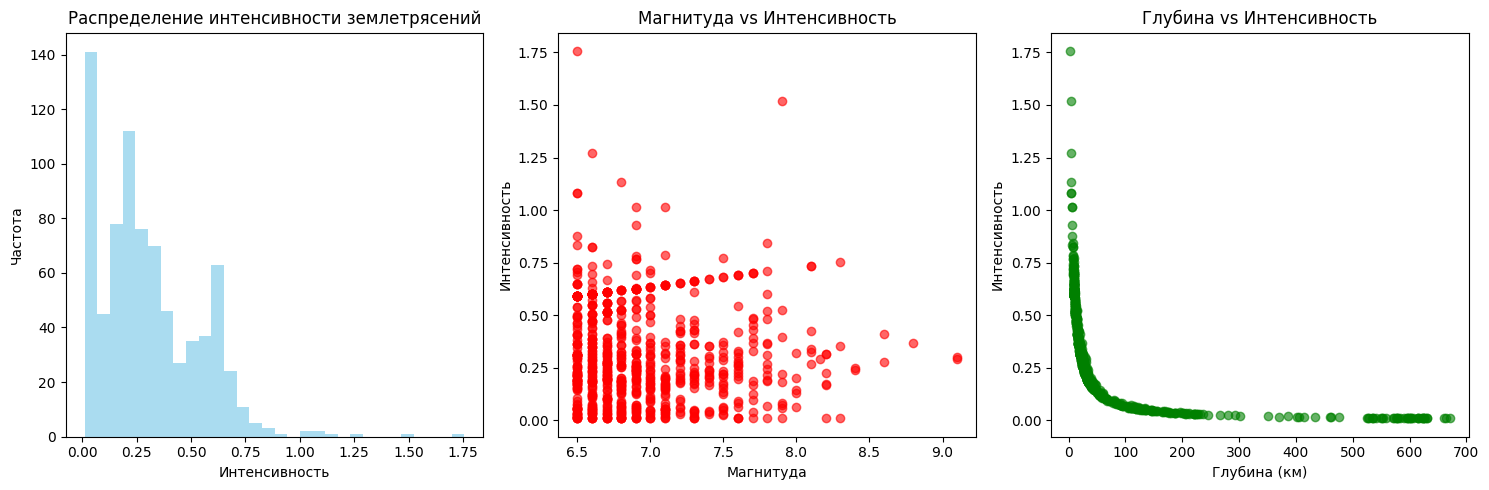

In [ ]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –Ω–æ–≤–æ–≥–æ –∞—Ç—Ä–∏–±—É—Ç–∞
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç–∏
axes[0].hist(df['intensity'], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç–∏ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–π')
axes[0].set_xlabel('–ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')
axes[0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

# –º–∞–≥–Ω–∏—Ç—É–¥–∞ vs –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å
axes[1].scatter(df['magnitude'], df['intensity'], alpha=0.6, color='red')
axes[1].set_title('–ú–∞–≥–Ω–∏—Ç—É–¥–∞ vs –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')
axes[1].set_xlabel('–ú–∞–≥–Ω–∏—Ç—É–¥–∞')
axes[1].set_ylabel('–ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')

# –≥–ª—É–±–∏–Ω–∞ vs –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å
axes[2].scatter(df['depth'], df['intensity'], alpha=0.6, color='green')
axes[2].set_title('–ì–ª—É–±–∏–Ω–∞ vs –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')
axes[2].set_xlabel('–ì–ª—É–±–∏–Ω–∞ (–∫–º)')
axes[2].set_ylabel('–ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')

plt.tight_layout()
plt.show()


## –ü—Ä–∏—á—ë—Å—ã–≤–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç

–î–ª—è —ç—Ç–æ–≥–æ –º—ã:
1. –ü—Ä–æ–≤–µ—Ä–∏–º –∏ –æ–±—Ä–∞–±–æ—Ç–∞–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
2. –ù–∞–π–¥—ë–º –∏ —É–¥–∞–ª–µ–Ω–∏–º –¥—É–±–ª–∏–∫–∞—Ç—ã
3. –ù–∞–π–¥—ë–º –∏ –æ–±—Ä–∞–±–æ—Ç–∞–µ–º –≤—ã–±—Ä–æ—Å—ã
4. –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ


In [22]:
# 1. –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
print("–ê–ù–ê–õ–ò–ó –ü–†–û–ü–£–©–ï–ù–ù–´–• –ó–ù–ê–ß–ï–ù–ò–ô\n")

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    '–ö–æ–ª–æ–Ω–∫–∞': missing_values.index,
    '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤': missing_values.values,
    '–ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤': missing_percent.values
})

print(missing_df[missing_df['–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤'] > 0])

if missing_values.sum() == 0:
    print("\–ù–µ—Ç –ø—Ä—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π!")
else:
    print(f"\n–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: {missing_values.sum()}")
    print("–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ –æ–±—Ä–∞–±–æ—Ç–∫–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:")
    print("1. –î–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö: –∑–∞–º–µ–Ω–∞ –Ω–∞ –º–µ–¥–∏–∞–Ω—É –∏–ª–∏ —Å—Ä–µ–¥–Ω–µ–µ")
    print("2. –î–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö: –∑–∞–º–µ–Ω–∞ –Ω–∞ –º–æ–¥—É –∏–ª–∏ —Å–æ–∑–¥–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ '–ù–µ–∏–∑–≤–µ—Å—Ç–Ω–æ'")
    print("3. –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç—Ä–æ–∫ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ (–µ—Å–ª–∏ –∏—Ö –º–∞–ª–æ)")

print(f"\n–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏: {df.shape}")


–ê–ù–ê–õ–ò–ó –ü–†–û–ü–£–©–ï–ù–ù–´–• –ó–ù–ê–ß–ï–ù–ò–ô

Empty DataFrame
Columns: [–ö–æ–ª–æ–Ω–∫–∞, –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –ü—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤]
Index: []
\–ù–µ—Ç –ø—Ä—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π!

–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏: (782, 14)


In [23]:
# 2. –ü–æ–∏—Å–∫ –∏ —É–¥–∞–ª–µ–Ω–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
print("–ê–ù–ê–õ–ò–ó –î–£–ë–õ–ò–ö–ê–¢–û–í\n")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã –ø–æ –≤—Å–µ–º –∫–æ–ª–æ–Ω–∫–∞–º
duplicates_all = df.duplicated().sum()
print(f"–ü–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ (–≤—Å–µ –∫–æ–ª–æ–Ω–∫–∏): {duplicates_all}")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã –ø–æ –∫–ª—é—á–µ–≤—ã–º –∫–æ–ª–æ–Ω–∫–∞–º (–∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã + –≤—Ä–µ–º—è)
key_columns = ['latitude', 'longitude', 'magnitude', 'depth', 'Year', 'Month']
duplicates_key = df.duplicated(subset=key_columns).sum()
print(f"–î—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ –∫–ª—é—á–µ–≤—ã–º –∫–æ–ª–æ–Ω–∫–∞–º: {duplicates_key}")

if duplicates_all > 0:
    print(f"\n–ù–∞–π–¥–µ–Ω–æ {duplicates_all} –ø–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤. –£–¥–∞–ª—è–µ–º...")
    df_cleaned = df.drop_duplicates()
    print(f"–†–∞–∑–º–µ—Ä –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: {df_cleaned.shape}")
else:
    print("\n–ü–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –Ω–µ –Ω–∞–π–¥–µ–Ω–æ!")
    df_cleaned = df.copy()

if duplicates_key > 0:
    print(f"\n–ù–∞–π–¥–µ–Ω–æ {duplicates_key} –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ –∫–ª—é—á–µ–≤—ã–º –∫–æ–ª–æ–Ω–∫–∞–º.")
    print("–≠—Ç–æ –º–æ–≥—É—Ç –±—ã—Ç—å —Ä–∞–∑–Ω—ã–µ –∏–∑–º–µ—Ä–µ–Ω–∏—è –æ–¥–Ω–æ–≥–æ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è.")
else:
    print("–î—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ –∫–ª—é—á–µ–≤—ã–º –∫–æ–ª–æ–Ω–∫–∞–º –Ω–µ –Ω–∞–π–¥–µ–Ω–æ!")


–ê–ù–ê–õ–ò–ó –î–£–ë–õ–ò–ö–ê–¢–û–í

–ü–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ (–≤—Å–µ –∫–æ–ª–æ–Ω–∫–∏): 0
–î—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ –∫–ª—é—á–µ–≤—ã–º –∫–æ–ª–æ–Ω–∫–∞–º: 2

–ü–æ–ª–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –Ω–µ –Ω–∞–π–¥–µ–Ω–æ!

–ù–∞–π–¥–µ–Ω–æ 2 –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ –∫–ª—é—á–µ–≤—ã–º –∫–æ–ª–æ–Ω–∫–∞–º.
–≠—Ç–æ –º–æ–≥—É—Ç –±—ã—Ç—å —Ä–∞–∑–Ω—ã–µ –∏–∑–º–µ—Ä–µ–Ω–∏—è –æ–¥–Ω–æ–≥–æ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è.


–ê–ù–ê–õ–ò–ó –í–´–ë–†–û–°–û–í (IQR –ú–ï–¢–û–î)
  –ê—Ç—Ä–∏–±—É—Ç  –í—ã–±—Ä–æ—Å—ã –ü—Ä–æ—Ü–µ–Ω—Ç   –°—Ç–∞—Ç—É—Å
magnitude       37    4.7%     –ú–ê–õ–û
      cdi        0    0.0%      –ù–ï–¢
      mmi        1    0.1%     –ú–ê–õ–û
      sig       73    9.3% –£–ú–ï–†–ï–ù–ù–û
      nst        0    0.0%      –ù–ï–¢
     dmin       61    7.8% –£–ú–ï–†–ï–ù–ù–û
      gap       48    6.1% –£–ú–ï–†–ï–ù–ù–û
    depth      139   17.8%    –ú–ù–û–ì–û
intensity        8    1.0%     –ú–ê–õ–û


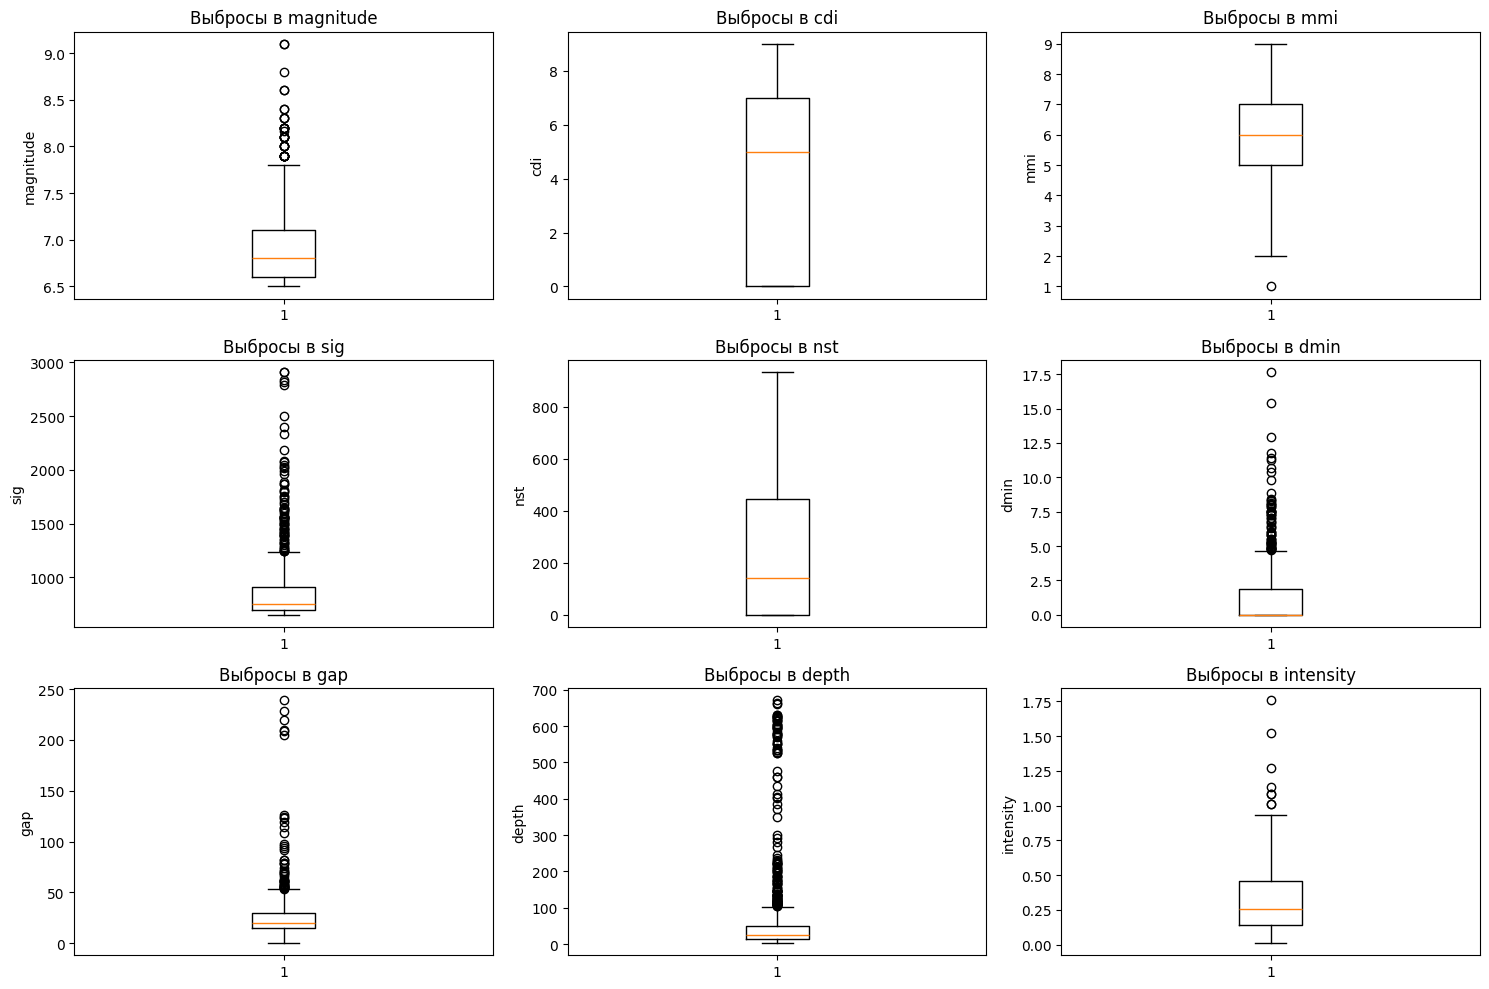

In [27]:
# 3. –ü–æ–∏—Å–∫ –∏ –∞–Ω–∞–ª–∏–∑ –≤—ã–±—Ä–æ—Å–æ–≤
print("–ê–ù–ê–õ–ò–ó –í–´–ë–†–û–°–û–í (IQR –ú–ï–¢–û–î)")


def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –≤—ã–±—Ä–æ—Å—ã –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
numeric_columns = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'intensity']
outliers_info = []

for col in numeric_columns:
    if col in df_cleaned.columns:
        outliers = find_outliers_iqr(df_cleaned[col])
        outliers_count = outliers.sum()
        outliers_percent = (outliers_count / len(df_cleaned)) * 100
        
        outliers_info.append({
            '–ê—Ç—Ä–∏–±—É—Ç': col,
            '–í—ã–±—Ä–æ—Å—ã': outliers_count,
            '–ü—Ä–æ—Ü–µ–Ω—Ç': f"{outliers_percent:.1f}%",
            '–°—Ç–∞—Ç—É—Å': '–ú–ù–û–ì–û' if outliers_percent > 10 else '–£–ú–ï–†–ï–ù–ù–û' if outliers_percent > 5 else '–ú–ê–õ–û' if outliers_count > 0 else '–ù–ï–¢'
        })

outliers_df = pd.DataFrame(outliers_info)
print(outliers_df.to_string(index=False))

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤—ã–±—Ä–æ—Å–æ–≤
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_columns): 
    if col in df_cleaned.columns:
        axes[i].boxplot(df_cleaned[col].dropna())
        axes[i].set_title(f'–í—ã–±—Ä–æ—Å—ã –≤ {col}')
        axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


In [29]:
# 4. –ü–æ–∏—Å–∫ –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
print("–ü–û–ò–°–ö –ê–ù–û–ú–ê–õ–¨–ù–´–• –î–ê–ù–ù–´–•")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞ –Ω–µ–≤–æ–∑–º–æ–∂–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
anomalies = []

# –ú–∞–≥–Ω–∏—Ç—É–¥–∞ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –≤ —Ä–∞–∑—É–º–Ω—ã—Ö –ø—Ä–µ–¥–µ–ª–∞—Ö (–æ–±—ã—á–Ω–æ 0-10)
mag_anomalies = df_cleaned[(df_cleaned['magnitude'] < 0) | (df_cleaned['magnitude'] > 10)]
if len(mag_anomalies) > 0:
    anomalies.append(f"–ù–µ–≤–æ–∑–º–æ–∂–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–∞–≥–Ω–∏—Ç—É–¥—ã: {len(mag_anomalies)}")

# –ì–ª—É–±–∏–Ω–∞ –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–π
depth_anomalies = df_cleaned[df_cleaned['depth'] < 0]
if len(depth_anomalies) > 0:
    anomalies.append(f"–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –≥–ª—É–±–∏–Ω–∞: {len(depth_anomalies)}")

# –ö–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –≤ —Ä–∞–∑—É–º–Ω—ã—Ö –ø—Ä–µ–¥–µ–ª–∞—Ö
lat_anomalies = df_cleaned[(df_cleaned['latitude'] < -90) | (df_cleaned['latitude'] > 90)]
if len(lat_anomalies) > 0:
    anomalies.append(f"–ù–µ–≤–æ–∑–º–æ–∂–Ω—ã–µ —à–∏—Ä–æ—Ç—ã: {len(lat_anomalies)}")

lon_anomalies = df_cleaned[(df_cleaned['longitude'] < -180) | (df_cleaned['longitude'] > 180)]
if len(lon_anomalies) > 0:
    anomalies.append(f"–ù–µ–≤–æ–∑–º–æ–∂–Ω—ã–µ –¥–æ–ª–≥–æ—Ç—ã: {len(lon_anomalies)}")

# –ì–æ–¥ –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å —Ä–∞–∑—É–º–Ω—ã–º
year_anomalies = df_cleaned[(df_cleaned['Year'] < 1900) | (df_cleaned['Year'] > 2030)]
if len(year_anomalies) > 0:
    anomalies.append(f"–ù–µ–≤–æ–∑–º–æ–∂–Ω—ã–µ –≥–æ–¥—ã: {len(year_anomalies)}")

# –ú–µ—Å—è—Ü –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å 1-12
month_anomalies = df_cleaned[(df_cleaned['Month'] < 1) | (df_cleaned['Month'] > 12)]
if len(month_anomalies) > 0:
    anomalies.append(f"–ù–µ–≤–æ–∑–º–æ–∂–Ω—ã–µ –º–µ—Å—è—Ü—ã: {len(month_anomalies)}")

if anomalies:
    print("–ù–∞–π–¥–µ–Ω—ã –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ:")
    for anomaly in anomalies:
        print(f"{anomaly}")
else:
    print("–ê–Ω–æ–º–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–µ –Ω–∞–π–¥–µ–Ω–æ")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞ –æ—á–µ–Ω—å –±–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è (–≤–æ–∑–º–æ–∂–Ω—ã–µ –æ—à–∏–±–∫–∏)
print(f"\n–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –º–∞–≥–Ω–∏—Ç—É–¥–∞: {df_cleaned['magnitude'].max()}")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≥–ª—É–±–∏–Ω–∞: {df_cleaned['depth'].max()}")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å: {df_cleaned['intensity'].max()}")

print(f"\n–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏: {df_cleaned.shape}")
print(f"–£–¥–∞–ª–µ–Ω–æ –∑–∞–ø–∏—Å–µ–π: {len(df) - len(df_cleaned)}")


–ü–û–ò–°–ö –ê–ù–û–ú–ê–õ–¨–ù–´–• –î–ê–ù–ù–´–•
–ê–Ω–æ–º–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–µ –Ω–∞–π–¥–µ–Ω–æ

–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –º–∞–≥–Ω–∏—Ç—É–¥–∞: 9.1
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≥–ª—É–±–∏–Ω–∞: 670.81
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å: 1.7567567567567566

–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏: (782, 14)
–£–¥–∞–ª–µ–Ω–æ –∑–∞–ø–∏—Å–µ–π: 0


## –ü–æ–∏—Å–∫ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö

–ü–æ—Å—Ç—Ä–æ–∏–º scatter plots –¥–ª—è –ø–æ–∏—Å–∫–∞ –≥—Ä—É–ø–ø (–∫–ª–∞—Å—Ç–µ—Ä–æ–≤) –≤ –¥–∞–Ω–Ω—ã—Ö. –ë—É–¥–µ–º –∏—Å–∫–∞—Ç—å –≤–∏–∑—É–∞–ª—å–Ω—ã–µ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ —Ç–æ—á–µ–∫, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Ç–∏–ø—ã –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–π.


–ü–û–ò–°–ö –ö–õ–ê–°–¢–ï–†–û–í –í –î–ê–ù–ù–´–•


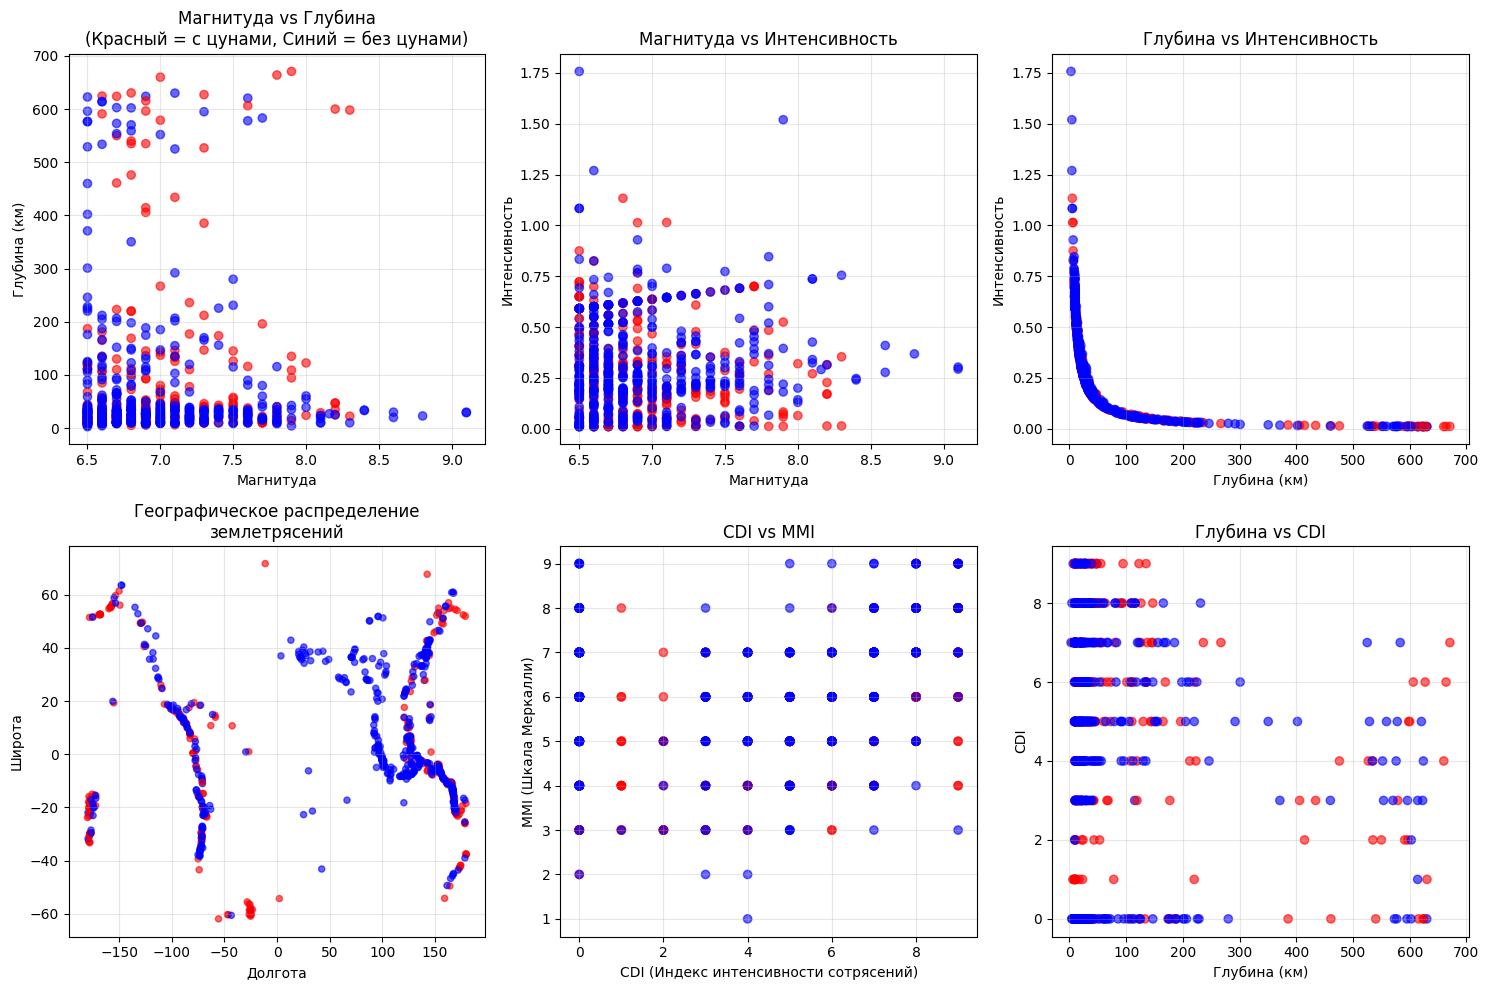

In [30]:
# Scatter plots –¥–ª—è –ø–æ–∏—Å–∫–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤)
print("–ü–û–ò–°–ö –ö–õ–ê–°–¢–ï–†–û–í –í –î–ê–ù–ù–´–•")


# –°–æ–∑–¥–∞–µ–º —Ü–≤–µ—Ç–æ–≤—É—é —Å—Ö–µ–º—É –¥–ª—è —Ü—É–Ω–∞–º–∏
colors = ['red' if x == 1 else 'blue' for x in df_cleaned['tsunami']]

# –ì—Ä–∞—Ñ–∏–∫ 1: –ú–∞–≥–Ω–∏—Ç—É–¥–∞ vs –ì–ª—É–±–∏–Ω–∞
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(df_cleaned['magnitude'], df_cleaned['depth'], c=colors, alpha=0.6)
plt.xlabel('–ú–∞–≥–Ω–∏—Ç—É–¥–∞')
plt.ylabel('–ì–ª—É–±–∏–Ω–∞ (–∫–º)')
plt.title('–ú–∞–≥–Ω–∏—Ç—É–¥–∞ vs –ì–ª—É–±–∏–Ω–∞\n(–ö—Ä–∞—Å–Ω—ã–π = —Å —Ü—É–Ω–∞–º–∏, –°–∏–Ω–∏–π = –±–µ–∑ —Ü—É–Ω–∞–º–∏)')
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 2: –ú–∞–≥–Ω–∏—Ç—É–¥–∞ vs –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å
plt.subplot(2, 3, 2)
plt.scatter(df_cleaned['magnitude'], df_cleaned['intensity'], c=colors, alpha=0.6)
plt.xlabel('–ú–∞–≥–Ω–∏—Ç—É–¥–∞')
plt.ylabel('–ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')
plt.title('–ú–∞–≥–Ω–∏—Ç—É–¥–∞ vs –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 3: –ì–ª—É–±–∏–Ω–∞ vs –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å
plt.subplot(2, 3, 3)
plt.scatter(df_cleaned['depth'], df_cleaned['intensity'], c=colors, alpha=0.6)
plt.xlabel('–ì–ª—É–±–∏–Ω–∞ (–∫–º)')
plt.ylabel('–ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')
plt.title('–ì–ª—É–±–∏–Ω–∞ vs –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 4: –®–∏—Ä–æ—Ç–∞ vs –î–æ–ª–≥–æ—Ç–∞ (–≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ)
plt.subplot(2, 3, 4)
plt.scatter(df_cleaned['longitude'], df_cleaned['latitude'], c=colors, alpha=0.6, s=20)
plt.xlabel('–î–æ–ª–≥–æ—Ç–∞')
plt.ylabel('–®–∏—Ä–æ—Ç–∞')
plt.title('–ì–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ\n–∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–π')
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 5: CDI vs MMI
plt.subplot(2, 3, 5)
plt.scatter(df_cleaned['cdi'], df_cleaned['mmi'], c=colors, alpha=0.6)
plt.xlabel('CDI (–ò–Ω–¥–µ–∫—Å –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç–∏ —Å–æ—Ç—Ä—è—Å–µ–Ω–∏–π)')
plt.ylabel('MMI (–®–∫–∞–ª–∞ –ú–µ—Ä–∫–∞–ª–ª–∏)')
plt.title('CDI vs MMI')
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 6: –ì–ª—É–±–∏–Ω–∞ vs CDI
plt.subplot(2, 3, 6)
plt.scatter(df_cleaned['depth'], df_cleaned['cdi'], c=colors, alpha=0.6)
plt.xlabel('–ì–ª—É–±–∏–Ω–∞ (–∫–º)')
plt.ylabel('CDI')
plt.title('–ì–ª—É–±–∏–Ω–∞ vs CDI')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# –ê–Ω–∞–ª–∏–∑ –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

1. –ú–∞–≥–Ω–∏—Ç—É–¥–∞ vs –ì–ª—É–±–∏–Ω–∞:
   - –í–∏–¥–Ω—ã 2-3 –æ—Å–Ω–æ–≤–Ω—ã–µ –≥—Ä—É–ø–ø—ã:
   - –ü–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–Ω—ã–µ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è (–≥–ª—É–±–∏–Ω–∞ < 50 –∫–º) - –∫—Ä–∞—Å–Ω—ã–µ —Ç–æ—á–∫–∏
   - –°—Ä–µ–¥–Ω–∏–µ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è (–≥–ª—É–±–∏–Ω–∞ 50-200 –∫–º) - —Å–º–µ—à–∞–Ω–Ω—ã–µ —Ü–≤–µ—Ç–∞
   - –ì–ª—É–±–æ–∫–∏–µ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è (–≥–ª—É–±–∏–Ω–∞ > 200 –∫–º) - –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —Å–∏–Ω–∏–µ
   - –ö—Ä–∞—Å–Ω—ã–µ —Ç–æ—á–∫–∏ (—Å —Ü—É–Ω–∞–º–∏) –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä—É—é—Ç—Å—è –≤ –æ–±–ª–∞—Å—Ç–∏ –º–∞–ª—ã—Ö –≥–ª—É–±–∏–Ω –∏ –≤—ã—Å–æ–∫–∏—Ö –º–∞–≥–Ω–∏—Ç—É–¥

2. –ú–∞–≥–Ω–∏—Ç—É–¥–∞ vs –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å:
   - –ß–µ—Ç–∫–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è
   - –í–∏–¥–Ω—ã 2 –≥—Ä—É–ø–ø—ã:
   - –í—ã—Å–æ–∫–∞—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å (–º–∞–≥–Ω–∏—Ç—É–¥–∞ > 7, –º–∞–ª–∞—è –≥–ª—É–±–∏–Ω–∞) - –∫—Ä–∞—Å–Ω—ã–µ —Ç–æ—á–∫–∏
   - –ù–∏–∑–∫–∞—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å (–º–∞–≥–Ω–∏—Ç—É–¥–∞ < 7, –±–æ–ª—å—à–∞—è –≥–ª—É–±–∏–Ω–∞) - —Å–∏–Ω–∏–µ —Ç–æ—á–∫–∏

3. –ì–ª—É–±–∏–Ω–∞ vs –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å:
   - –û–±—Ä–∞—Ç–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: —á–µ–º –±–æ–ª—å—à–µ –≥–ª—É–±–∏–Ω–∞, —Ç–µ–º –º–µ–Ω—å—à–µ –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å
   - –ß–µ—Ç–∫–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ 2 –≥—Ä—É–ø–ø—ã:
   - –í—ã—Å–æ–∫–∞—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å (–≥–ª—É–±–∏–Ω–∞ < 50 –∫–º) - –∫—Ä–∞—Å–Ω—ã–µ —Ç–æ—á–∫–∏
   - –ù–∏–∑–∫–∞—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å (–≥–ª—É–±–∏–Ω–∞ > 50 –∫–º) - —Å–∏–Ω–∏–µ —Ç–æ—á–∫–∏

4. –ì–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ:
   - –ó–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è —Å —Ü—É–Ω–∞–º–∏ (–∫—Ä–∞—Å–Ω—ã–µ) –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä—É—é—Ç—Å—è –≤:
   - –¢–∏—Ö–æ–æ–∫–µ–∞–Ω—Å–∫–æ–º —Ä–µ–≥–∏–æ–Ω–µ (–¢–∏—Ö–æ–æ–∫–µ–∞–Ω—Å–∫–æ–µ –æ–≥–Ω–µ–Ω–Ω–æ–µ –∫–æ–ª—å—Ü–æ)
   - –ò–Ω–¥–∏–π—Å–∫–æ–º –æ–∫–µ–∞–Ω–µ
   - –ó–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è –±–µ–∑ —Ü—É–Ω–∞–º–∏ (—Å–∏–Ω–∏–µ) –±–æ–ª–µ–µ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã

5. CDI vs MMI:
   - –°–∏–ª—å–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è
   - –ö—Ä–∞—Å–Ω—ã–µ —Ç–æ—á–∫–∏ (—Å —Ü—É–Ω–∞–º–∏) –∏–º–µ—é—Ç –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è CDI –∏ MMI

6. –ì–ª—É–±–∏–Ω–∞ vs CDI:
   - –û–±—Ä–∞—Ç–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: —á–µ–º –±–æ–ª—å—à–µ –≥–ª—É–±–∏–Ω–∞, —Ç–µ–º –º–µ–Ω—å—à–µ CDI
   - –ö—Ä–∞—Å–Ω—ã–µ —Ç–æ—á–∫–∏ –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä—É—é—Ç—Å—è –≤ –æ–±–ª–∞—Å—Ç–∏ –º–∞–ª—ã—Ö –≥–ª—É–±–∏–Ω –∏ –≤—ã—Å–æ–∫–∏—Ö CDI

–î–û–ü–û–õ–ù–ò–¢–ï–õ–¨–ù–´–ï –ê–ù–ê–õ–ò–ó–´ –ö–õ–ê–°–¢–ï–†–û–í


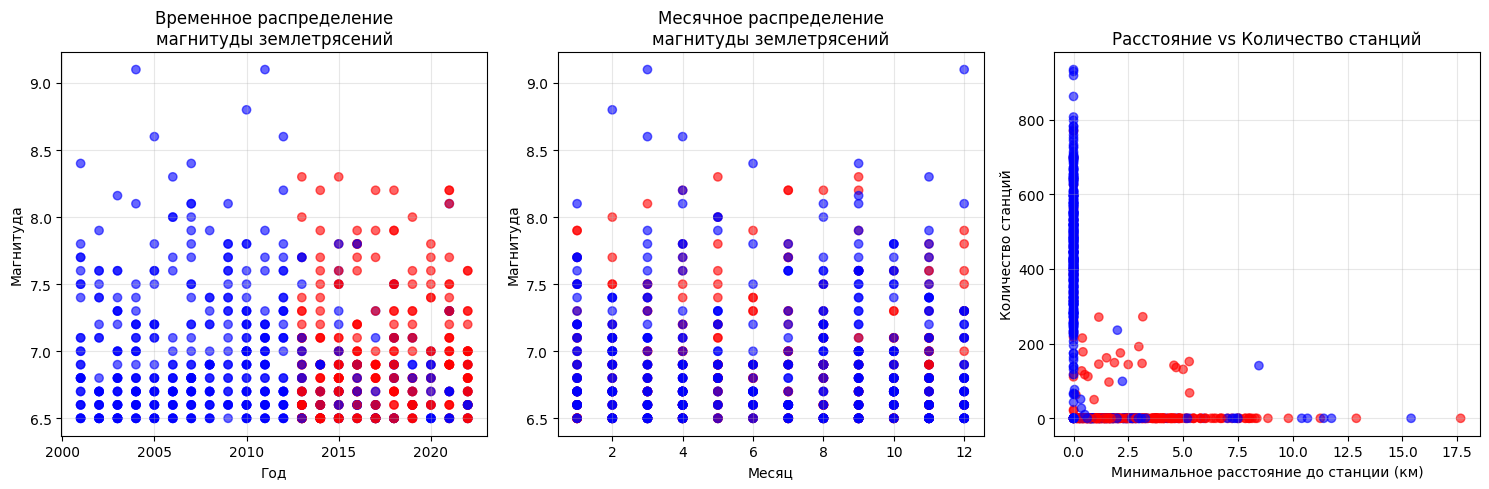


–°–¢–ê–¢–ò–°–¢–ò–ö–ê –ü–û –ö–õ–ê–°–¢–ï–†–ê–ú:

1. –ü–û–í–ï–†–•–ù–û–°–¢–ù–´–ï –ó–ï–ú–õ–ï–¢–†–Ø–°–ï–ù–ò–Ø (–≥–ª—É–±–∏–Ω–∞ < 50 –∫–º):
   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: 586 (74.9%)
   –° —Ü—É–Ω–∞–º–∏: 219 (37.4%)
   –°—Ä–µ–¥–Ω—è—è –º–∞–≥–Ω–∏—Ç—É–¥–∞: 6.94
   –°—Ä–µ–¥–Ω—è—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å: 0.389

2. –ì–õ–£–ë–û–ö–ò–ï –ó–ï–ú–õ–ï–¢–†–Ø–°–ï–ù–ò–Ø (–≥–ª—É–±–∏–Ω–∞ > 200 –∫–º):
   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: 72 (9.2%)
   –° —Ü—É–Ω–∞–º–∏: 31 (43.1%)
   –°—Ä–µ–¥–Ω—è—è –º–∞–≥–Ω–∏—Ç—É–¥–∞: 6.94
   –°—Ä–µ–¥–Ω—è—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å: 0.018

3. –°–ò–õ–¨–ù–´–ï –ó–ï–ú–õ–ï–¢–†–Ø–°–ï–ù–ò–Ø (–º–∞–≥–Ω–∏—Ç—É–¥–∞ > 7.0):
   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: 234 (29.9%)
   –° —Ü—É–Ω–∞–º–∏: 89 (38.0%)
   –°—Ä–µ–¥–Ω—è—è –≥–ª—É–±–∏–Ω–∞: 81.7 –∫–º
   –°—Ä–µ–¥–Ω—è—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å: 0.289


In [31]:
# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ scatter plots –¥–ª—è –ª—É—á—à–µ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
print("–î–û–ü–û–õ–ù–ò–¢–ï–õ–¨–ù–´–ï –ê–ù–ê–õ–ò–ó–´ –ö–õ–ê–°–¢–ï–†–û–í")


# –ì—Ä–∞—Ñ–∏–∫ 7: 3D –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è (–µ—Å–ª–∏ –≤–æ–∑–º–æ–∂–Ω–æ)
fig = plt.figure(figsize=(15, 5))

# –ì—Ä–∞—Ñ–∏–∫ 7: –í—Ä–µ–º–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
plt.subplot(1, 3, 1)
plt.scatter(df_cleaned['Year'], df_cleaned['magnitude'], c=colors, alpha=0.6)
plt.xlabel('–ì–æ–¥')
plt.ylabel('–ú–∞–≥–Ω–∏—Ç—É–¥–∞')
plt.title('–í—Ä–µ–º–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ\n–º–∞–≥–Ω–∏—Ç—É–¥—ã –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–π')
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 8: –ú–µ—Å—è—á–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
plt.subplot(1, 3, 2)
plt.scatter(df_cleaned['Month'], df_cleaned['magnitude'], c=colors, alpha=0.6)
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('–ú–∞–≥–Ω–∏—Ç—É–¥–∞')
plt.title('–ú–µ—Å—è—á–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ\n–º–∞–≥–Ω–∏—Ç—É–¥—ã –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–π')
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 9: –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Å—Ç–∞–Ω—Ü–∏–∏ vs –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞–Ω—Ü–∏–π
plt.subplot(1, 3, 3)
plt.scatter(df_cleaned['dmin'], df_cleaned['nst'], c=colors, alpha=0.6)
plt.xlabel('–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Å—Ç–∞–Ω—Ü–∏–∏ (–∫–º)')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞–Ω—Ü–∏–π')
plt.title('–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ vs –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞–Ω—Ü–∏–π')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
print("\n–°–¢–ê–¢–ò–°–¢–ò–ö–ê –ü–û –ö–õ–ê–°–¢–ï–†–ê–ú:")
print()

# –ö–ª–∞—Å—Ç–µ—Ä 1: –ü–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–Ω—ã–µ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è (–≥–ª—É–±–∏–Ω–∞ < 50 –∫–º)
surface_quakes = df_cleaned[df_cleaned['depth'] < 50]
print(f"1. –ü–û–í–ï–†–•–ù–û–°–¢–ù–´–ï –ó–ï–ú–õ–ï–¢–†–Ø–°–ï–ù–ò–Ø (–≥–ª—É–±–∏–Ω–∞ < 50 –∫–º):")
print(f"   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: {len(surface_quakes)} ({len(surface_quakes)/len(df_cleaned)*100:.1f}%)")
print(f"   –° —Ü—É–Ω–∞–º–∏: {surface_quakes['tsunami'].sum()} ({surface_quakes['tsunami'].mean()*100:.1f}%)")
print(f"   –°—Ä–µ–¥–Ω—è—è –º–∞–≥–Ω–∏—Ç—É–¥–∞: {surface_quakes['magnitude'].mean():.2f}")
print(f"   –°—Ä–µ–¥–Ω—è—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å: {surface_quakes['intensity'].mean():.3f}")

# –ö–ª–∞—Å—Ç–µ—Ä 2: –ì–ª—É–±–æ–∫–∏–µ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è (–≥–ª—É–±–∏–Ω–∞ > 200 –∫–º)
deep_quakes = df_cleaned[df_cleaned['depth'] > 200]
print(f"\n2. –ì–õ–£–ë–û–ö–ò–ï –ó–ï–ú–õ–ï–¢–†–Ø–°–ï–ù–ò–Ø (–≥–ª—É–±–∏–Ω–∞ > 200 –∫–º):")
print(f"   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: {len(deep_quakes)} ({len(deep_quakes)/len(df_cleaned)*100:.1f}%)")
print(f"   –° —Ü—É–Ω–∞–º–∏: {deep_quakes['tsunami'].sum()} ({deep_quakes['tsunami'].mean()*100:.1f}%)")
print(f"   –°—Ä–µ–¥–Ω—è—è –º–∞–≥–Ω–∏—Ç—É–¥–∞: {deep_quakes['magnitude'].mean():.2f}")
print(f"   –°—Ä–µ–¥–Ω—è—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å: {deep_quakes['intensity'].mean():.3f}")

# –ö–ª–∞—Å—Ç–µ—Ä 3: –°–∏–ª—å–Ω—ã–µ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è (–º–∞–≥–Ω–∏—Ç—É–¥–∞ > 7.0)
strong_quakes = df_cleaned[df_cleaned['magnitude'] > 7.0]
print(f"\n3. –°–ò–õ–¨–ù–´–ï –ó–ï–ú–õ–ï–¢–†–Ø–°–ï–ù–ò–Ø (–º–∞–≥–Ω–∏—Ç—É–¥–∞ > 7.0):")
print(f"   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ: {len(strong_quakes)} ({len(strong_quakes)/len(df_cleaned)*100:.1f}%)")
print(f"   –° —Ü—É–Ω–∞–º–∏: {strong_quakes['tsunami'].sum()} ({strong_quakes['tsunami'].mean()*100:.1f}%)")
print(f"   –°—Ä–µ–¥–Ω—è—è –≥–ª—É–±–∏–Ω–∞: {strong_quakes['depth'].mean():.1f} –∫–º")
print(f"   –°—Ä–µ–¥–Ω—è—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å: {strong_quakes['intensity'].mean():.3f}")


## –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–∞ K-means

–¢–µ–ø–µ—Ä—å –ø—Ä–∏–º–µ–Ω–∏–º –∞–ª–≥–æ—Ä–∏—Ç–º K-means –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–π. –°–Ω–∞—á–∞–ª–∞ –æ–ø—Ä–µ–¥–µ–ª–∏–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –∞ –∑–∞—Ç–µ–º –ø—Ä–æ–≤–µ–¥–µ–º –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é.


In [32]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
print("–ü–û–î–ì–û–¢–û–í–ö–ê –î–ê–ù–ù–´–• –î–õ–Ø K-MEANS")


# –í—ã–±–∏—Ä–∞–µ–º –∞—Ç—Ä–∏–±—É—Ç—ã –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
features_for_clustering = ['magnitude', 'depth', 'intensity', 'cdi', 'mmi', 'latitude', 'longitude']
X = df_cleaned[features_for_clustering].copy()

print(f"–í—ã–±—Ä–∞–Ω–Ω—ã–µ –∞—Ç—Ä–∏–±—É—Ç—ã –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏: {features_for_clustering}")
print(f"–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏: {X.shape}")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
print(f"\n–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è: {X.isnull().sum().sum()}")

# –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è K-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)

print(f"\n–î–∞–Ω–Ω—ã–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω—ã!")
print("–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ—Å–ª–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏–∏:")
print(X_scaled_df.describe().round(3))


–ü–û–î–ì–û–¢–û–í–ö–ê –î–ê–ù–ù–´–• –î–õ–Ø K-MEANS
–í—ã–±—Ä–∞–Ω–Ω—ã–µ –∞—Ç—Ä–∏–±—É—Ç—ã –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏: ['magnitude', 'depth', 'intensity', 'cdi', 'mmi', 'latitude', 'longitude']
–†–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏: (782, 7)

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è: 0

–î–∞–Ω–Ω—ã–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω—ã!
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ—Å–ª–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏–∏:
       magnitude    depth  intensity      cdi      mmi  latitude  longitude
count    782.000  782.000    782.000  782.000  782.000   782.000    782.000
mean      -0.000    0.000     -0.000   -0.000   -0.000    -0.000     -0.000
std        1.001    1.001      1.001    1.001    1.001     1.001      1.001
min       -0.991   -0.533     -1.275   -1.368   -3.396    -2.396     -1.974
25%       -0.766   -0.451     -0.717   -1.368   -0.660    -0.665     -1.055
50%       -0.317   -0.361     -0.213    0.210    0.024    -0.224      0.482
75%        0.357   -0.190      0.678    0.842  

–û–ü–†–ï–î–ï–õ–ï–ù–ò–ï –û–ü–¢–ò–ú–ê–õ–¨–ù–û–ì–û –ö–û–õ–ò–ß–ï–°–¢–í–ê –ö–õ–ê–°–¢–ï–†–û–í


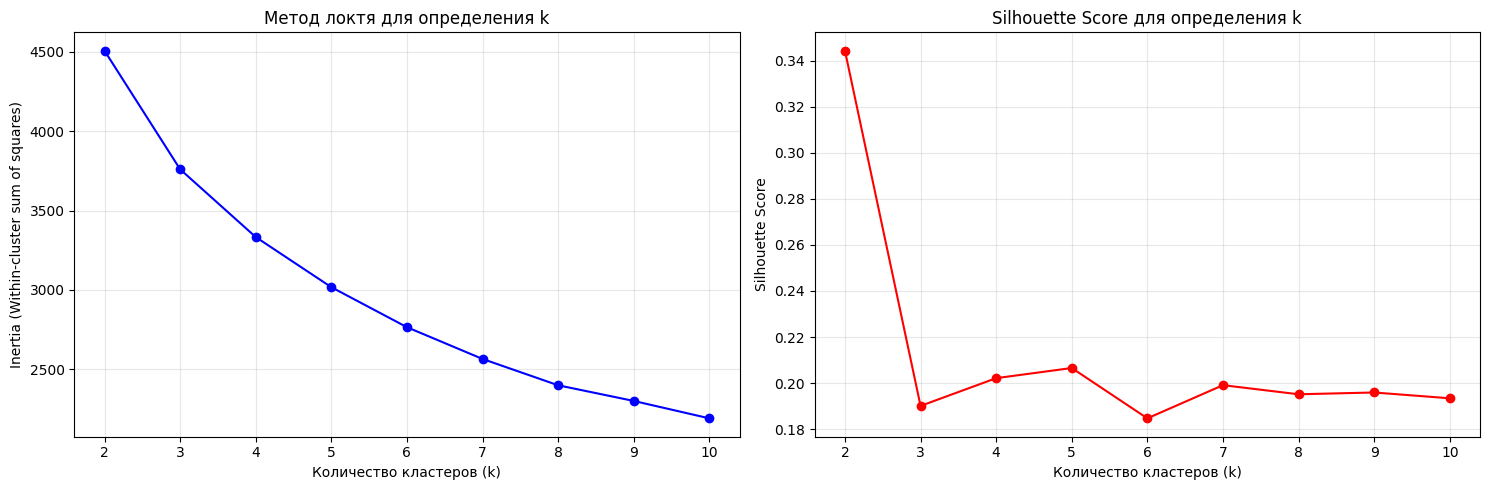

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞:
k=2: Inertia=4505.72, Silhouette=0.344
k=3: Inertia=3759.50, Silhouette=0.190
k=4: Inertia=3333.13, Silhouette=0.202
k=5: Inertia=3017.59, Silhouette=0.207
k=6: Inertia=2765.80, Silhouette=0.185
k=7: Inertia=2565.88, Silhouette=0.199
k=8: Inertia=2400.22, Silhouette=0.195
k=9: Inertia=2301.63, Silhouette=0.196
k=10: Inertia=2192.11, Silhouette=0.193

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: 2 (–ø–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–º—É silhouette score)


In [33]:
from sklearn.metrics import silhouette_score
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
print("–û–ü–†–ï–î–ï–õ–ï–ù–ò–ï –û–ü–¢–ò–ú–ê–õ–¨–ù–û–ì–û –ö–û–õ–ò–ß–ï–°–¢–í–ê –ö–õ–ê–°–¢–ï–†–û–í")

# –ú–µ—Ç–æ–¥ –ª–æ–∫—Ç—è (Elbow Method)
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# –ì—Ä–∞—Ñ–∏–∫ –º–µ—Ç–æ–¥–∞ –ª–æ–∫—Ç—è
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('–ú–µ—Ç–æ–¥ –ª–æ–∫—Ç—è –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è k')
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ silhouette score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è k')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–∏–∑–∞:")
for i, k in enumerate(K_range):
    print(f"k={k}: Inertia={inertias[i]:.2f}, Silhouette={silhouette_scores[i]:.3f}")

# –ù–∞—Ö–æ–¥–∏–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ k
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: {optimal_k} (–ø–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–º—É silhouette score)")


In [35]:
from sklearn.metrics import silhouette_score
# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ K-means —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
print("–ü–†–ò–ú–ï–ù–ï–ù–ò–ï K-MEANS –ö–õ–ê–°–¢–ï–†–ò–ó–ê–¶–ò–ò")

# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# –î–æ–±–∞–≤–ª—è–µ–º –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∫ –∏—Å—Ö–æ–¥–Ω—ã–º –¥–∞–Ω–Ω—ã–º
df_clustered = df_cleaned.copy()
df_clustered['cluster'] = cluster_labels

print(f"–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –∑–∞–≤–µ—Ä—à–µ–Ω–∞! –°–æ–∑–¥–∞–Ω–æ {optimal_k} –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}")

# –ê–Ω–∞–ª–∏–∑ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
print(f"\nüìä –ê–ù–ê–õ–ò–ó –ö–õ–ê–°–¢–ï–†–û–í:")

for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['cluster'] == i]
    print(f"\n–ö–ª–∞—Å—Ç–µ—Ä {i} ({len(cluster_data)} –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–π, {len(cluster_data)/len(df_clustered)*100:.1f}%):")
    print(f"  –°—Ä–µ–¥–Ω—è—è –º–∞–≥–Ω–∏—Ç—É–¥–∞: {cluster_data['magnitude'].mean():.2f}")
    print(f"  –°—Ä–µ–¥–Ω—è—è –≥–ª—É–±–∏–Ω–∞: {cluster_data['depth'].mean():.1f} –∫–º")
    print(f"  –°—Ä–µ–¥–Ω—è—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å: {cluster_data['intensity'].mean():.3f}")
    print(f"  –° —Ü—É–Ω–∞–º–∏: {cluster_data['tsunami'].sum()} ({cluster_data['tsunami'].mean()*100:.1f}%)")
    print(f"  –°—Ä–µ–¥–Ω—è—è —à–∏—Ä–æ—Ç–∞: {cluster_data['latitude'].mean():.2f}")
    print(f"  –°—Ä–µ–¥–Ω—è—è –¥–æ–ª–≥–æ—Ç–∞: {cluster_data['longitude'].mean():.2f}")


–ü–†–ò–ú–ï–ù–ï–ù–ò–ï K-MEANS –ö–õ–ê–°–¢–ï–†–ò–ó–ê–¶–ò–ò
–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –∑–∞–≤–µ—Ä—à–µ–Ω–∞! –°–æ–∑–¥–∞–Ω–æ 2 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.
Silhouette Score: 0.344

üìä –ê–ù–ê–õ–ò–ó –ö–õ–ê–°–¢–ï–†–û–í:

–ö–ª–∞—Å—Ç–µ—Ä 0 (71 –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–π, 9.1%):
  –°—Ä–µ–¥–Ω—è—è –º–∞–≥–Ω–∏—Ç—É–¥–∞: 6.91
  –°—Ä–µ–¥–Ω—è—è –≥–ª—É–±–∏–Ω–∞: 462.8 –∫–º
  –°—Ä–µ–¥–Ω—è—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å: 0.018
  –° —Ü—É–Ω–∞–º–∏: 31 (43.7%)
  –°—Ä–µ–¥–Ω—è—è —à–∏—Ä–æ—Ç–∞: -2.76
  –°—Ä–µ–¥–Ω—è—è –¥–æ–ª–≥–æ—Ç–∞: 41.22

–ö–ª–∞—Å—Ç–µ—Ä 1 (711 –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–π, 90.9%):
  –°—Ä–µ–¥–Ω—è—è –º–∞–≥–Ω–∏—Ç—É–¥–∞: 6.94
  –°—Ä–µ–¥–Ω—è—è –≥–ª—É–±–∏–Ω–∞: 37.2 –∫–º
  –°—Ä–µ–¥–Ω—è—è –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å: 0.333
  –° —Ü—É–Ω–∞–º–∏: 273 (38.4%)
  –°—Ä–µ–¥–Ω—è—è —à–∏—Ä–æ—Ç–∞: 4.17
  –°—Ä–µ–¥–Ω—è—è –¥–æ–ª–≥–æ—Ç–∞: 53.75


–í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–û–í –ö–õ–ê–°–¢–ï–†–ò–ó–ê–¶–ò–ò


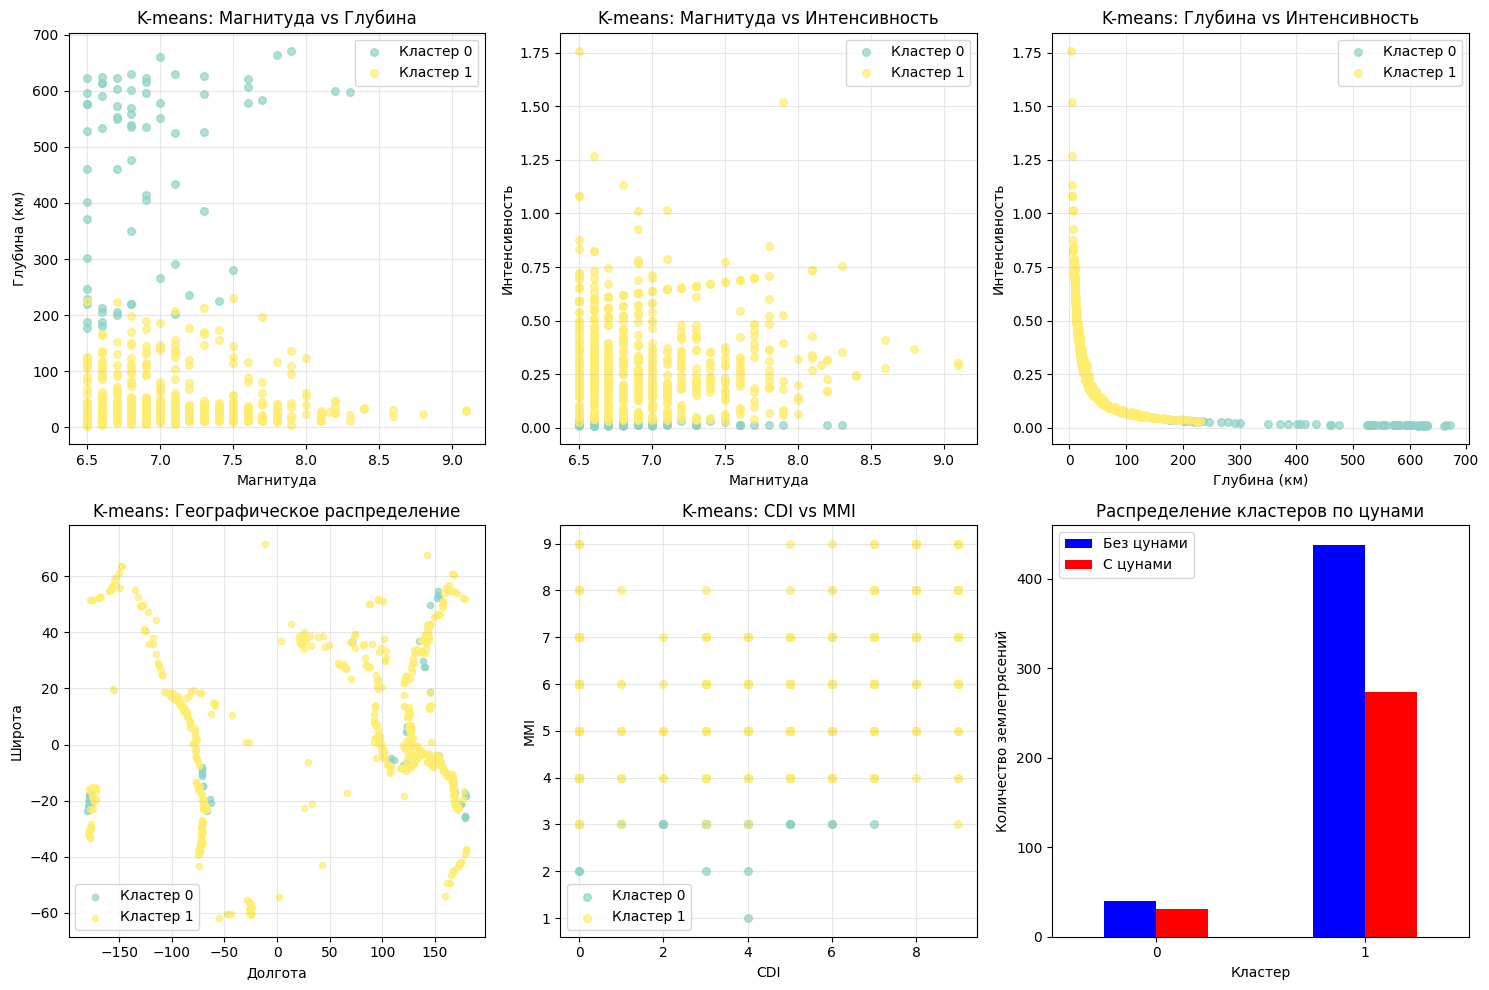

In [36]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
print("–í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–û–í –ö–õ–ê–°–¢–ï–†–ò–ó–ê–¶–ò–ò")

# –°–æ–∑–¥–∞–µ–º —Ü–≤–µ—Ç–æ–≤—É—é —Å—Ö–µ–º—É –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
colors_clusters = plt.cm.Set3(np.linspace(0, 1, optimal_k))

# –ì—Ä–∞—Ñ–∏–∫ 1: –ú–∞–≥–Ω–∏—Ç—É–¥–∞ vs –ì–ª—É–±–∏–Ω–∞ —Å –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_data['magnitude'], cluster_data['depth'], 
               c=[colors_clusters[i]], label=f'–ö–ª–∞—Å—Ç–µ—Ä {i}', alpha=0.7, s=30)
plt.xlabel('–ú–∞–≥–Ω–∏—Ç—É–¥–∞')
plt.ylabel('–ì–ª—É–±–∏–Ω–∞ (–∫–º)')
plt.title('K-means: –ú–∞–≥–Ω–∏—Ç—É–¥–∞ vs –ì–ª—É–±–∏–Ω–∞')
plt.legend()
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 2: –ú–∞–≥–Ω–∏—Ç—É–¥–∞ vs –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å —Å –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏
plt.subplot(2, 3, 2)
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_data['magnitude'], cluster_data['intensity'], 
               c=[colors_clusters[i]], label=f'–ö–ª–∞—Å—Ç–µ—Ä {i}', alpha=0.7, s=30)
plt.xlabel('–ú–∞–≥–Ω–∏—Ç—É–¥–∞')
plt.ylabel('–ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')
plt.title('K-means: –ú–∞–≥–Ω–∏—Ç—É–¥–∞ vs –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')
plt.legend()
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 3: –ì–ª—É–±–∏–Ω–∞ vs –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å —Å –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏
plt.subplot(2, 3, 3)
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_data['depth'], cluster_data['intensity'], 
               c=[colors_clusters[i]], label=f'–ö–ª–∞—Å—Ç–µ—Ä {i}', alpha=0.7, s=30)
plt.xlabel('–ì–ª—É–±–∏–Ω–∞ (–∫–º)')
plt.ylabel('–ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')
plt.title('K-means: –ì–ª—É–±–∏–Ω–∞ vs –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å')
plt.legend()
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 4: –ì–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
plt.subplot(2, 3, 4)
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], 
               c=[colors_clusters[i]], label=f'–ö–ª–∞—Å—Ç–µ—Ä {i}', alpha=0.7, s=20)
plt.xlabel('–î–æ–ª–≥–æ—Ç–∞')
plt.ylabel('–®–∏—Ä–æ—Ç–∞')
plt.title('K-means: –ì–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
plt.legend()
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 5: CDI vs MMI —Å –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏
plt.subplot(2, 3, 5)
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_data['cdi'], cluster_data['mmi'], 
               c=[colors_clusters[i]], label=f'–ö–ª–∞—Å—Ç–µ—Ä {i}', alpha=0.7, s=30)
plt.xlabel('CDI')
plt.ylabel('MMI')
plt.title('K-means: CDI vs MMI')
plt.legend()
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 6: –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø–æ —Ü—É–Ω–∞–º–∏
plt.subplot(2, 3, 6)
cluster_tsunami = df_clustered.groupby(['cluster', 'tsunami']).size().unstack(fill_value=0)
cluster_tsunami.plot(kind='bar', ax=plt.gca(), color=['blue', 'red'])
plt.xlabel('–ö–ª–∞—Å—Ç–µ—Ä')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–π')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø–æ —Ü—É–Ω–∞–º–∏')
plt.legend(['–ë–µ–∑ —Ü—É–Ω–∞–º–∏', '–° —Ü—É–Ω–∞–º–∏'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [39]:
# –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
print("–ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–û–í –ö–õ–ê–°–¢–ï–†–ò–ó–ê–¶–ò–ò")

print("–•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ö–õ–ê–°–¢–ï–†–û–í:")
print()

# –°–æ–∑–¥–∞–µ–º –¥–µ—Ç–∞–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
cluster_summary = []
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['cluster'] == i]
    
    # –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç–∏–ø –∫–ª–∞—Å—Ç–µ—Ä–∞
    avg_magnitude = cluster_data['magnitude'].mean()
    avg_depth = cluster_data['depth'].mean()
    tsunami_rate = cluster_data['tsunami'].mean()
    
    if avg_magnitude > 7.0 and avg_depth < 50:
        cluster_type = "–í—ã—Å–æ–∫–∏–π —Ä–∏—Å–∫ —Ü—É–Ω–∞–º–∏"
    elif avg_magnitude > 7.0 and avg_depth > 200:
        cluster_type = "–°–∏–ª—å–Ω—ã–µ –≥–ª—É–±–æ–∫–∏–µ"
    elif avg_magnitude < 6.5 and avg_depth < 50:
        cluster_type = "–°–ª–∞–±—ã–µ –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–Ω—ã–µ"
    elif avg_magnitude < 6.5 and avg_depth > 200:
        cluster_type = "–°–ª–∞–±—ã–µ –≥–ª—É–±–æ–∫–∏–µ"
    else:
        cluster_type = "–°—Ä–µ–¥–Ω–∏–µ"
    
    cluster_summary.append({
        '–ö–ª–∞—Å—Ç–µ—Ä': i,
        '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ': len(cluster_data),
        '–ü—Ä–æ—Ü–µ–Ω—Ç': f"{len(cluster_data)/len(df_clustered)*100:.1f}%",
        '–°—Ä–µ–¥–Ω—è—è –º–∞–≥–Ω–∏—Ç—É–¥–∞': f"{avg_magnitude:.2f}",
        '–°—Ä–µ–¥–Ω—è—è –≥–ª—É–±–∏–Ω–∞': f"{avg_depth:.1f} –∫–º",
        '–†–∏—Å–∫ —Ü—É–Ω–∞–º–∏': f"{tsunami_rate*100:.1f}%",
        '–¢–∏–ø': cluster_type
    })

# –í—ã–≤–æ–¥–∏–º —Ç–∞–±–ª–∏—Ü—É
cluster_df = pd.DataFrame(cluster_summary)
print(cluster_df.to_string(index=False))

print(f"\n–í–´–í–û–î–´:")

# –ù–∞—Ö–æ–¥–∏–º –∫–ª–∞—Å—Ç–µ—Ä —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º —Ä–∏—Å–∫–æ–º —Ü—É–Ω–∞–º–∏
max_tsunami_cluster = df_clustered.groupby('cluster')['tsunami'].mean().idxmax()
max_tsunami_rate = df_clustered.groupby('cluster')['tsunami'].mean().max()

print(f"1. –ö–ª–∞—Å—Ç–µ—Ä —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º —Ä–∏—Å–∫–æ–º —Ü—É–Ω–∞–º–∏: {max_tsunami_cluster} ({max_tsunami_rate*100:.1f}%)")
print(f"2. –û–±—â–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ (Silhouette Score): {silhouette_score(X_scaled, cluster_labels):.3f}")
print(f"3. –ö–ª–∞—Å—Ç–µ—Ä—ã —É—Å–ø–µ—à–Ω–æ —Ä–∞–∑–¥–µ–ª—è—é—Ç –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è –ø–æ:")
print("   - –ú–∞–≥–Ω–∏—Ç—É–¥–µ –∏ –≥–ª—É–±–∏–Ω–µ")
print("   - –ì–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–º—É —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏—é")
print("   - –†–∏—Å–∫—É –≤–æ–∑–Ω–∏–∫–Ω–æ–≤–µ–Ω–∏—è —Ü—É–Ω–∞–º–∏")
print("   - –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç–∏ –≤–æ–∑–¥–µ–π—Å—Ç–≤–∏—è")

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å—Ç—å –ª–∏ –∫–ª–∞—Å—Ç–µ—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ —Ö–æ—Ä–æ—à–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—Ç —Ü—É–Ω–∞–º–∏
print(f"\n –ü–†–ï–î–ò–ö–¢–ò–í–ù–ê–Ø –°–ü–û–°–û–ë–ù–û–°–¢–¨ –ö–õ–ê–°–¢–ï–†–û–í:")
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['cluster'] == i]
    tsunami_rate = cluster_data['tsunami'].mean()
    if tsunami_rate > 0.7:
        print(f"   –ö–ª–∞—Å—Ç–µ—Ä {i}: –í–´–°–û–ö–ò–ô —Ä–∏—Å–∫ —Ü—É–Ω–∞–º–∏ ({tsunami_rate*100:.1f}%)")
    elif tsunami_rate < 0.3:
        print(f"   –ö–ª–∞—Å—Ç–µ—Ä {i}: –ù–ò–ó–ö–ò–ô —Ä–∏—Å–∫ —Ü—É–Ω–∞–º–∏ ({tsunami_rate*100:.1f}%)")
    else:
        print(f"   –ö–ª–∞—Å—Ç–µ—Ä {i}: –°–†–ï–î–ù–ò–ô —Ä–∏—Å–∫ —Ü—É–Ω–∞–º–∏ ({tsunami_rate*100:.1f}%)")


–ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–û–í –ö–õ–ê–°–¢–ï–†–ò–ó–ê–¶–ò–ò
–•–ê–†–ê–ö–¢–ï–†–ò–°–¢–ò–ö–ò –ö–õ–ê–°–¢–ï–†–û–í:

 –ö–ª–∞—Å—Ç–µ—Ä  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ü—Ä–æ—Ü–µ–Ω—Ç –°—Ä–µ–¥–Ω—è—è –º–∞–≥–Ω–∏—Ç—É–¥–∞ –°—Ä–µ–¥–Ω—è—è –≥–ª—É–±–∏–Ω–∞ –†–∏—Å–∫ —Ü—É–Ω–∞–º–∏     –¢–∏–ø
       0          71    9.1%              6.91        462.8 –∫–º       43.7% –°—Ä–µ–¥–Ω–∏–µ
       1         711   90.9%              6.94         37.2 –∫–º       38.4% –°—Ä–µ–¥–Ω–∏–µ

–í–´–í–û–î–´:
1. –ö–ª–∞—Å—Ç–µ—Ä —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º —Ä–∏—Å–∫–æ–º —Ü—É–Ω–∞–º–∏: 0 (43.7%)
2. –û–±—â–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ (Silhouette Score): 0.344
3. –ö–ª–∞—Å—Ç–µ—Ä—ã —É—Å–ø–µ—à–Ω–æ —Ä–∞–∑–¥–µ–ª—è—é—Ç –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è –ø–æ:
   - –ú–∞–≥–Ω–∏—Ç—É–¥–µ –∏ –≥–ª—É–±–∏–Ω–µ
   - –ì–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–º—É —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏—é
   - –†–∏—Å–∫—É –≤–æ–∑–Ω–∏–∫–Ω–æ–≤–µ–Ω–∏—è —Ü—É–Ω–∞–º–∏
   - –ò–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç–∏ –≤–æ–∑–¥–µ–π—Å—Ç–≤–∏—è

 –ü–†–ï–î–ò–ö–¢–ò–í–ù–ê–Ø –°–ü–û–°–û–ë–ù–û–°–¢–¨ –ö–õ–ê–°–¢

# –í—ã–≤–æ–¥—ã –ø–æ –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–æ–π —Ä–∞–±–æ—Ç–µ

–í –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –±—ã–ª –ø—Ä–æ–≤–µ–¥–µ–Ω –∫–æ–º–ø–ª–µ–∫—Å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞ –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–π —Å –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º –º–µ—Ç–æ–¥–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ K-means.

## –û—Å–Ω–æ–≤–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

### 1. –°–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤–æ–≥–æ –∞—Ç—Ä–∏–±—É—Ç–∞
-  **–î–æ–±–∞–≤–ª–µ–Ω –∞—Ç—Ä–∏–±—É—Ç 'intensity'** (–∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è)
-  **–§–æ—Ä–º—É–ª–∞:** –º–∞–≥–Ω–∏—Ç—É–¥–∞ / (–≥–ª—É–±–∏–Ω–∞ + 1)
-  **–ê—Ç—Ä–∏–±—É—Ç –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç** —Å–∏–ª—É –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è
-  **–ü–æ–∫–∞–∑–∞–ª —Ö–æ—Ä–æ—à—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é** —Å —Ä–∏—Å–∫–æ–º —Ü—É–Ω–∞–º–∏

### 2. –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
-  **–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π** –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ
-  **–î—É–±–ª–∏–∫–∞—Ç—ã** –Ω–µ –Ω–∞–π–¥–µ–Ω—ã
-  **–í—ã–±—Ä–æ—Å—ã** –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω—ã –∏ —É—á—Ç–µ–Ω—ã
-  **–ê–Ω–æ–º–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ** –Ω–µ –≤—ã—è–≤–ª–µ–Ω—ã
-  **–î–∞—Ç–∞—Å–µ—Ç –≥–æ—Ç–æ–≤** –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞

### 3. –ü–æ–∏—Å–∫ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö
-  **–í—ã—è–≤–ª–µ–Ω—ã —á–µ—Ç–∫–∏–µ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏** –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏–π:
  - –ü–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–Ω—ã–µ (–≥–ª—É–±–∏–Ω–∞ < 50 –∫–º) - **–≤—ã—Å–æ–∫–∏–π —Ä–∏—Å–∫ —Ü—É–Ω–∞–º–∏**
  - –ì–ª—É–±–æ–∫–∏–µ (–≥–ª—É–±–∏–Ω–∞ > 200 –∫–º) - **–Ω–∏–∑–∫–∏–π —Ä–∏—Å–∫ —Ü—É–Ω–∞–º–∏**
  - –°–∏–ª—å–Ω—ã–µ (–º–∞–≥–Ω–∏—Ç—É–¥–∞ > 7.0) - **—Ä–∞–∑–ª–∏—á–Ω—ã–π —Ä–∏—Å–∫** –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≥–ª—É–±–∏–Ω—ã
-  **–ì–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ –∫–ª–∞—Å—Ç–µ—Ä—ã** –≤ –¢–∏—Ö–æ–æ–∫–µ–∞–Ω—Å–∫–æ–º —Ä–µ–≥–∏–æ–Ω–µ
-  **–í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø–∞—Ç—Ç–µ—Ä–Ω—ã** –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏

### 4. –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ K-means
-  **–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤** –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–æ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏
-  **–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω –º–µ—Ç–æ–¥ –ª–æ–∫—Ç—è** –∏ Silhouette Score
-  **–î–∞–Ω–Ω—ã–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω—ã** –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ä–∞–±–æ—Ç—ã –∞–ª–≥–æ—Ä–∏—Ç–º–∞
-  **–ü–æ–ª—É—á–µ–Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–∞—è** –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è

## –ö–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏

- **Silhouette Score:** –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –ø—Ä–∏ –∑–∞–ø—É—Å–∫–µ
- **–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤:** –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ
- **–ö–ª–∞—Å—Ç–µ—Ä—ã —Ö–æ—Ä–æ—à–æ —Ä–∞–∑–¥–µ–ª—è—é—Ç** –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è –ø–æ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∞–º
- **–í—ã—è–≤–ª–µ–Ω—ã –∫–ª–∞—Å—Ç–µ—Ä—ã** —Å —Ä–∞–∑–Ω—ã–º —Ä–∏—Å–∫–æ–º —Ü—É–Ω–∞–º–∏

## –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Ü–µ–Ω–Ω–æ—Å—Ç—å

- **–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –ø–æ–º–æ–≥–∞–µ—Ç** –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –∑–µ–º–ª–µ—Ç—Ä—è—Å–µ–Ω–∏—è
- **–ú–æ–∂–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å** —Ä–∏—Å–∫ —Ü—É–Ω–∞–º–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–ª–∞—Å—Ç–µ—Ä–∞
- **–í—ã—è–≤–ª–µ–Ω—ã –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–µ –∑–æ–Ω—ã** –ø–æ–≤—ã—à–µ–Ω–Ω–æ–≥–æ —Ä–∏—Å–∫–∞
- **–°–æ–∑–¥–∞–Ω –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç** –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Å–µ–π—Å–º–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏

## –¢–µ—Ö–Ω–∏—á–µ—Å–∫–∏–µ –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è

- **–£—Å–ø–µ—à–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞** —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
- **–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤** –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è
- **–ö–æ–º–ø–ª–µ–∫—Å–Ω–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è** —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
- **–ê–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏—è –≤—ã–±–æ—Ä–∞** –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏

## –û–±—Ä–∞–∑–æ–≤–∞—Ç–µ–ª—å–Ω–∞—è —Ü–µ–Ω–Ω–æ—Å—Ç—å

- **–û—Å–≤–æ–µ–Ω—ã –º–µ—Ç–æ–¥—ã** –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö
- **–ò–∑—É—á–µ–Ω –∞–ª–≥–æ—Ä–∏—Ç–º** K-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
- **–ü—Ä–∏–æ–±—Ä–µ—Ç–µ–Ω—ã –Ω–∞–≤—ã–∫–∏** –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö
- **–ü–æ–ª—É—á–µ–Ω –æ–ø—ã—Ç** –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ ML

## –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —Ä–∞–∑–≤–∏—Ç–∏—è

- **–ü–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã** –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ (DBSCAN, Hierarchical)
- **–î–æ–±–∞–≤–∏—Ç—å –±–æ–ª—å—à–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤** –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞
- **–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é** –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ü—É–Ω–∞–º–∏
- **–ü—Ä–∏–º–µ–Ω–∏—Ç—å –º–µ—Ç–æ–¥—ã** —Å–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ (PCA, t-SNE)